

# Task1:Predict Using Supervised ML

### By:Sayed Mahmoud

## Table of Contents
<ul>
<li><a href="#import">Importing Data</a></li>
<li><a href="#visualize">Visualize Data</a></li>
<li><a href="#proce">Data Preprocessing</a></li>
<li><a href="#Model">Building Model</a></li>
<li><a href="#Ques">Predicting the percentage a student who studied for 9.25 hours daily is supposed to get...</a></li>
</ul>

<a id='import'></a>
## Importing Data

In [1]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
%matplotlib inline

In [2]:
#import data
df=pd.read_csv("Data.csv")

In [3]:
#show data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#statistics information about data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#sheck for dupilicates
df.duplicated().sum()

0

<a id='visualize'></a>
## Data Visualization

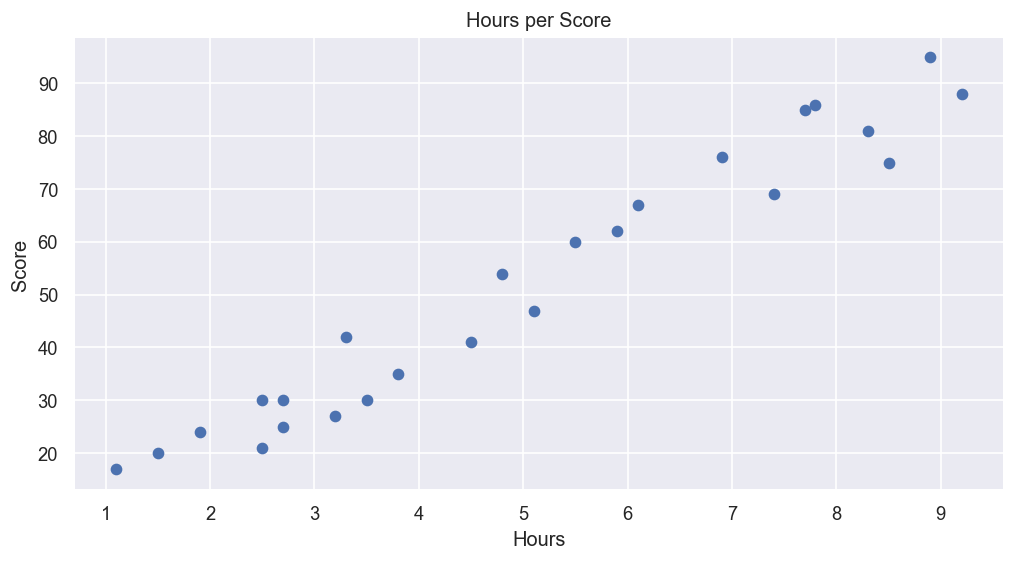

In [7]:
#make scatter for 2 features 
sns.set()
plt.figure(figsize=(10,5), dpi = 120)
plt.scatter(df.Hours,df.Scores)  
plt.title('Hours per Score')  
plt.xlabel('Hours')  
plt.ylabel('Score ')  
plt.show()

In [8]:
#correletion about data
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


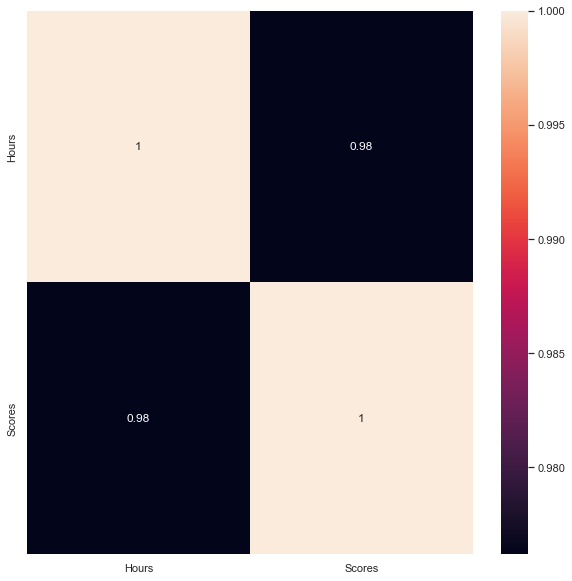

In [9]:
#make Heatmap for the data
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### as we see from the graphs we conclude that there is a postive correletion between two features Hours , Scores 

<a id='proce'></a>
## Data Preprocessing
<li><a href="#imp">Importing Data</a></li> 
<li><a href="#split">Spliting Data</a></li>
<li><a href="#Normal">Normalize Data</a></li>

<a id='imp'></a>
### importing libraries

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [11]:
#make a copy of columns to preprocessing it
x=df.Hours.copy()
y=df.Scores.copy()

In [12]:
#change it to arrays
x=np.array(x)
y=np.array(y)

In [13]:
#display arrays
print(x)
print("---------------")
print(y)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8]
---------------
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


<a id='split'></a>
## Spliting Data

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=100)

In [30]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(18,) (7,)
(18,) (7,)


In [31]:
x_train, x_test, y_train, y_test = x_train.reshape(-1,1), x_test.reshape(-1,1), y_train.reshape(-1,1), y_test.reshape(-1,1)

In [32]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(18, 1) (7, 1)
(18, 1) (7, 1)


<a id='Normal'></a>
## Normalize Data 

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit_transform(x_train, y_train)

array([[-0.15910484],
       [ 1.54374693],
       [-0.27520837],
       [-0.66222013],
       [ 1.00193046],
       [-1.0492319 ],
       [-0.04300131],
       [-0.97182954],
       [-1.59104837],
       [-1.28143896],
       [ 0.34401046],
       [-0.77832366],
       [ 0.96322928],
       [-1.0492319 ],
       [ 1.4276434 ],
       [ 0.1118034 ],
       [ 1.27283869],
       [ 1.19543634]])

<a id='Model'></a>
## Building Model


In [35]:
model = LinearRegression()

In [36]:
model.fit(x_train, y_train);

In [37]:
y_pred = model.predict(x_test)

In [38]:
mean_squared_error(y_test, y_pred, squared=False)

4.999916451372885

In [39]:
r2_score(y_test, y_pred)

0.9403157736545141

> ### The accuracy of our model is 94% , and the RMSE is 5%

<a id='Ques'></a>
### Predicting the percentage a student who studied for 9.25 hours daily is supposed to get...

In [40]:
model.predict([[9.25]])

array([[93.02223095]])

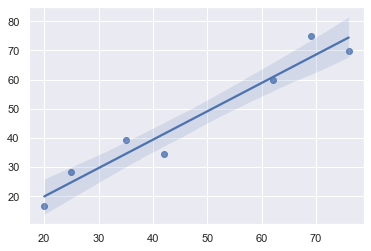

In [41]:
sns.regplot(x=y_test, y=y_pred);